<a href="https://colab.research.google.com/github/rakso-dev/TIA_proyecto/blob/main/proyecto_TIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
train_dir = "drive/MyDrive/TIA_proyecto/DATASET/TRAIN"
test_dir = "drive/MyDrive/TIA_proyecto/DATASET/TEST"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (150,100),
                                                    color_mode = 'grayscale',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (150,100),
                                                  color_mode = 'grayscale',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (5,5), input_shape=(150, 100, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 96, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 44, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 18, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 9, 128)       0

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
history = model.fit(train_generator, epochs = 35, validation_data=validation_generator)

Epoch 1/35
21/55 [==========>...................] - ETA: 1:55 - loss: 1.6687 - accuracy: 0.2422

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 [==============================] - 228s 4s/step - loss: 1.5987 - accuracy: 0.2656 - val_loss: 1.2412 - val_accuracy: 0.4891
Epoch 2/35
55/55 [==============================] - 67s 1s/step - loss: 1.3330 - accuracy: 0.4388 - val_loss: 0.6917 - val_accuracy: 0.7609
Epoch 3/35
55/55 [==============================] - 69s 1s/step - loss: 1.1240 - accuracy: 0.5554 - val_loss: 0.5537 - val_accuracy: 0.7935
Epoch 4/35
55/55 [==============================] - 65s 1s/step - loss: 1.0148 - accuracy: 0.6085 - val_loss: 0.5256 - val_accuracy: 0.8478
Epoch 5/35
55/55 [==============================] - 71s 1s/step - loss: 0.8681 - accuracy: 0.6790 - val_loss: 0.3512 - val_accuracy: 0.8478
Epoch 6/35
55/55 [==============================] - 67s 1s/step - loss: 0.7037 - accuracy: 0.7321 - val_loss: 0.3365 - val_accuracy: 0.8587
Epoch 7/35
55/55 [==============================] - 66s 1s/step - loss: 0.6814 - accuracy: 0.7448 - val_loss: 0.3521 - val_accuracy: 0.8913
Epoch 8/35
55/55 [============

In [8]:
history

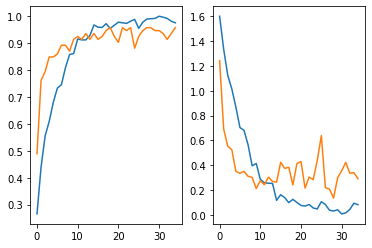

In [9]:
_, axarr = plt.subplots(1,2)

axarr[0].plot(history.history['accuracy'])
axarr[0].plot(history.history['val_accuracy'])

axarr[1].plot(history.history['loss'])
axarr[1].plot(history.history['val_loss'])